In [1]:
%matplotlib inline
%pylab inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import xarray as xr
import copy
import cartopy.crs as ccrs
import csv
import cartopy.feature as cft
from collections import OrderedDict

from dask.distributed import Client
import climtas.nci

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg_c1', '025deg_c1', '01deg_c1', '1deg_c2', '025deg_c2', '01deg_c2', '1deg_c3', '025deg_c3', '01deg_c3']


In [2]:
import climtas.nci
climtas.nci.GadiClient(malloc_trim_threshold='64kib')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 8,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33655,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://127.0.0.1:42173,Total threads: 1
Dashboard: /proxy/34121/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:34711,


In [3]:
session = cc.database.create_session()

In [4]:
data = copy.deepcopy(exptdata.exptdict) 

In [5]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight", facecolor = 'w')  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

### Time series of IR_Aus (5-year averaged) 

In [24]:
dataset1 = pd.read_csv('3.2 IR_value/IR_Aus(1).csv')

X1 = dataset1.iloc[:, 1].values

w = 5 

x1 = np.convolve(X1, np.ones(w), 'valid') / w

In [69]:
def time_series_Aus():
    
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,180,1):
        t1.append(tt)

    for tt in range (1,180,10):
        t2.append(tt)
        
    plt.plot(t1,x1, 'r',label = 'IR_Aus 1deg')

    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of IR_Aus')
    plt.xlabel('every 5-year')
    plt.ylabel('(Sv)')
    plt.ylim([-30,-10])
    # plt.ylim([-15,6])
    
    plt.plot(T1, y11)
    plt.plot(T2, y12)
    plt.plot(T3, y13)
    
    savefigure('time series of IR_Aus')

In [57]:
T1 = np.arange(1,62)
T2 = np.arange(62,123)
T3 = np.arange(123,180)

In [58]:
trend_Aus_1 = np.polyfit(T1, x1[0:61], 1)
trend_Aus_2 = np.polyfit(T2, x1[61:122], 1)
trend_Aus_3 = np.polyfit(T3, x1[122:179], 1)

In [73]:
y11 = trend_Aus_1[1] + T1*trend_Aus_1[0]
y12 = trend_Aus_2[1] + T2*trend_Aus_2[0]
y13 = trend_Aus_3[1] + T3*trend_Aus_3[0]

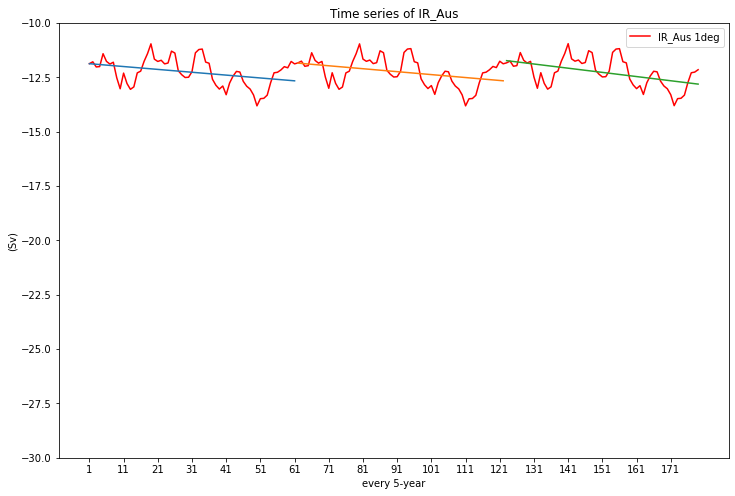

In [71]:
time_series_Aus()

### Time series of ST_NZ (5-year averaged) 

In [24]:
dataset1 = pd.read_csv('Sverdrup_trans_35(1).csv')

X1 = -dataset1.iloc[:, 1].values

w = 5 

x1 = np.convolve(X1, np.ones(w), 'valid') / w

In [25]:
def time_series_ST_NZ():
    
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,180,1):
        t1.append(tt)

    for tt in range (1,180,10):
        t2.append(tt)
        
    plt.plot(t1,x1, 'r',label = 'ST_NZ 1deg')

    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of ST_NZ')
    plt.xlabel('year')
    plt.ylabel('(Sv)')
    # plt.ylim([-40,-10])
    # plt.ylim([-15,6])
    
    plt.plot(T1, y11)
    plt.plot(T2, y12)
    plt.plot(T3, y13)
    
    savefigure('time series of ST_NZ')

In [26]:
T1 = np.arange(1,62)
T2 = np.arange(62,123)
T3 = np.arange(123,180)

In [27]:
trend_ST_NZ_1 = np.polyfit(T1, x1[0:61], 1)
trend_ST_NZ_2 = np.polyfit(T2, x1[61:122], 1)
trend_ST_NZ_3 = np.polyfit(T3, x1[122:179], 1)

In [28]:
y11 = trend_ST_NZ_1[1] + T1*trend_ST_NZ_1[0]
y12 = trend_ST_NZ_2[1] + T2*trend_ST_NZ_2[0]
y13 = trend_ST_NZ_3[1] + T3*trend_ST_NZ_3[0]

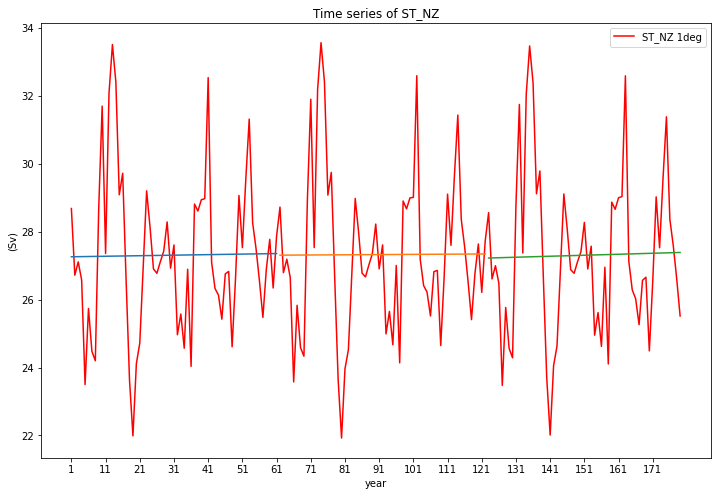

In [29]:
time_series_ST_NZ()

### Time series of IR_NZ (5-year averaged) 

In [12]:
dataset2 = pd.read_csv('IR_NZ(1).csv')

X2 = dataset2.iloc[:, 1].values

w = 5 

x2 = np.convolve(X2, np.ones(w), 'valid') / w

In [13]:
def time_series_NZ():
    
    fig = plt.figure(figsize=(12,8))
    
    t1 = []
    t2 = []
    for tt in range (1,180,1):
        t1.append(tt)
    for tt in range (1,180,10):
        t2.append(tt)
    
    ax1 = fig.add_subplot(111)
    ax1.plot(t1,x2, 'r',label = 'IR_NZ 1deg')
    ax1.legend(loc = 'upper right')                       
    ax1.set_xticks(t2)
    ax1.set_title('Time series of IR_NZ')
    ax1.set_xlabel('year')
    ax1.set_ylabel('(Sv)')
    # ax1.set_ylim([-30,-10])

    ax1.plot(T1, y21)
    ax1.plot(T2, y22)
    ax1.plot(T3, y23)
    
#     t3 = []
#     for tt in range (1,51,1):
#         t3.append(tt)
    
#     ax2 = ax1.twinx()
#     ax2.plot(t3,x3,'b',label = 'SAM index')
#     ax2.legend(loc = 'upper right') 
    
    
    savefigure('time series of IR_NZ with SAM index')

In [14]:
T1 = np.arange(1,62)
T2 = np.arange(62,123)
T3 = np.arange(123,180)

In [15]:
trend_NZ_1 = np.polyfit(T1, x2[0:61], 1)
trend_NZ_2 = np.polyfit(T2, x2[61:122], 1)
trend_NZ_3 = np.polyfit(T3, x2[122:179], 1)

In [16]:
y21 = trend_NZ_1[1] + T1*trend_NZ_1[0]
y22 = trend_NZ_2[1] + T2*trend_NZ_2[0]
y23 = trend_NZ_3[1] + T3*trend_NZ_3[0]

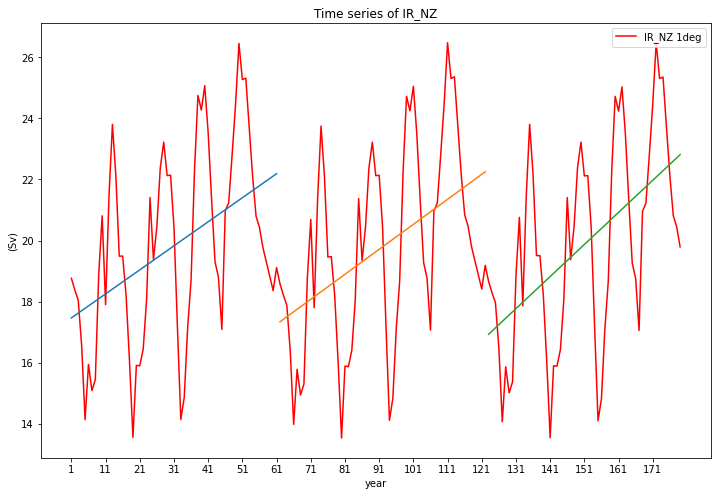

In [17]:
time_series_NZ()

### Map of trend of tau_x

In [6]:
tstart = pd.to_datetime('1958/01/01')
tend = pd.to_datetime('2019/01/01')

In [7]:
%%time

ekey = '1deg_c2'
    
expt = data[ekey]['expt']

tau_x = cc.querying.getvar(expt, variable='tau_x', 
                          session=session, frequency='1 monthly',
                          start_time=str(tstart.year), 
                          end_time=str(tend.year)).sel(time=slice(tstart,tend)).compute() # .sel(xu_ocean=slice(-250,-50)).sel(yu_ocean=slice(-60,10)).compute()
# tau_x = tau_x.resample(time='A').mean('time')

tau_y = cc.querying.getvar(expt, variable='tau_y', 
                          session=session, frequency='1 monthly',
                          start_time=str(tstart.year), 
                          end_time=str(tend.year)).sel(time=slice(tstart,tend)).compute() # .sel(xu_ocean=slice(-250,-50)).sel(yu_ocean=slice(-60,10))
# tau_y = tau_y.resample(time='A').mean('time')

CPU times: user 6.08 s, sys: 965 ms, total: 7.05 s
Wall time: 18.3 s


In [8]:
def linear_trend(x):
    date = x.time
    ndate = np.arange(len(date))
    pf = np.polyfit(ndate, x, 1)
    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(pf[0])

In [9]:
%%time

# stack lat and lon into a single dimension called allpoints
stacked = tau_x.stack(allpoints=['yu_ocean','xu_ocean'])
# apply the function over allpoints to calculate the trend at each point
trend = stacked.groupby('allpoints').apply(linear_trend)
# unstack back to lat lon coordinates
trend_unstacked_x = trend.unstack('allpoints')

CPU times: user 1min 28s, sys: 4.8 s, total: 1min 33s
Wall time: 1min 29s


In [10]:
%%time

# stack lat and lon into a single dimension called allpoints
stacked = tau_y.stack(allpoints=['yu_ocean','xu_ocean'])
# apply the function over allpoints to calculate the trend at each point
trend = stacked.groupby('allpoints').apply(linear_trend)
# unstack back to lat lon coordinates
trend_unstacked_y = trend.unstack('allpoints')

CPU times: user 1min 28s, sys: 3.69 s, total: 1min 32s
Wall time: 1min 28s


In [11]:
land_50m = cft.NaturalEarthFeature('physical', 'land', '110m',
                                        edgecolor='black',
                                        facecolor='gray',
                                        linewidth=0.5)
# cmp = plt.get_cmap('gist_ncar_r')  # confusing with the most common form of colourblindness (deuteranomaly)
cmp = plt.get_cmap('seismic')

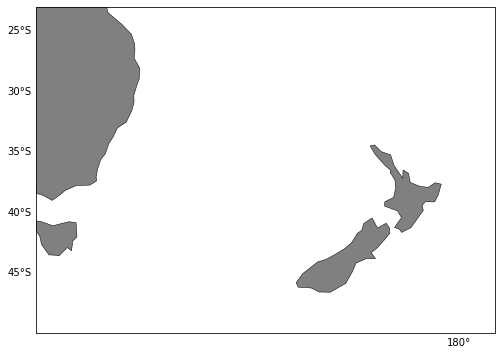

In [35]:
plt.figure(figsize(12,6))

# clev = np.arange(-1e-4,1e-4,1e-5)

ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(land_50m)
ax.set_extent([-215, -177, -50, -23], crs=ccrs.PlateCarree())


gridlines = ax.gridlines(draw_labels=True) # add gridlines
gridlines.xlines = False 
gridlines.ylines = False # do not show x and y liene, necause we only want to add the longitude and latitude.
gridlines.right_labels = False
gridlines.top_labels = False


savefigure('map of section')

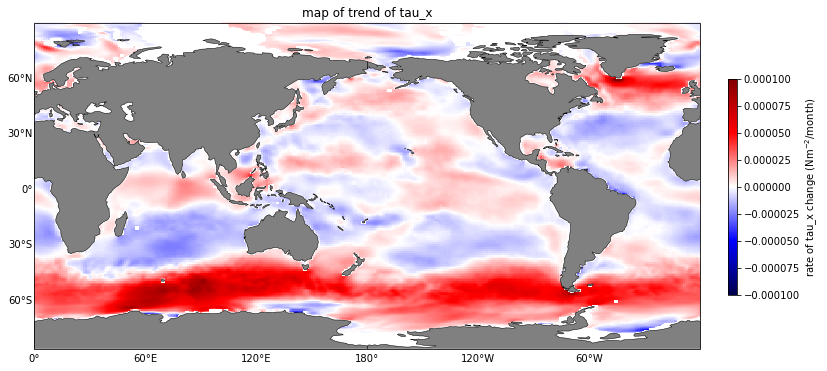

In [12]:
plt.figure(figsize(12,6))

# clev = np.arange(-1e-4,1e-4,1e-5)

ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(land_50m)
# ax.set_extent([-250, -50, -60, 10], crs=ccrs.PlateCarree())

gridlines = ax.gridlines(draw_labels=True) # add gridlines
gridlines.xlines = False 
gridlines.ylines = False # do not show x and y liene, necause we only want to add the longitude and latitude.
gridlines.right_labels = False
gridlines.top_labels = False
p1 = trend_unstacked_x.plot(cmap=cmp, extend='both', vmin=-10e-5, vmax=10e-5,
                        add_colorbar=False, transform=ccrs.PlateCarree())
p1.cmap.set_over(color=cmp(255), alpha=None)
plt.title('map of trend of tau_x')
    
    
ax2 = plt.axes([0.93,0.25,0.01,0.5])
cb = plt.colorbar(p1,cax=ax2, orientation='vertical')
cb.ax.set_ylabel('rate of tau_x change (Nm$^{-2}$/month)')

savefigure('map of trend of tau_x 1deg_c2')

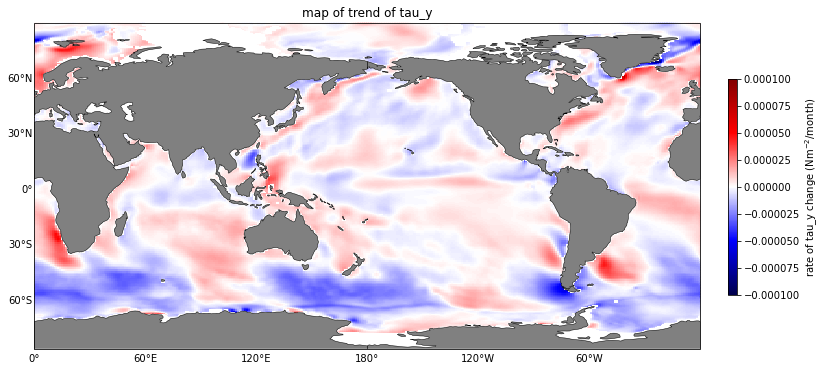

In [13]:
plt.figure(figsize(12,6))

ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(land_50m)
# ax.set_extent([-250, -50, -60, 10], crs=ccrs.PlateCarree())

gridlines = ax.gridlines(draw_labels=True) # add gridlines
gridlines.xlines = False 
gridlines.ylines = False # do not show x and y liene, necause we only want to add the longitude and latitude.
gridlines.right_labels = False
gridlines.top_labels = False
p1 = trend_unstacked_y.plot(cmap=cmp, extend='both', vmin=-10e-5, vmax=10e-5,
                        add_colorbar=False, transform=ccrs.PlateCarree())
p1.cmap.set_over(color=cmp(255), alpha=None)
plt.title('map of trend of tau_y')
    
    
ax2 = plt.axes([0.93,0.25,0.01,0.5])
cb = plt.colorbar(p1,cax=ax2, orientation='vertical')
cb.ax.set_ylabel('rate of tau_y change (Nm$^{-2}$/month)')

savefigure('map of trend of tau_y 1deg_c2')

### Map of trend of SLP

In [6]:
tstart = pd.to_datetime('1958/01/01')
tend = pd.to_datetime('2019/01/01')

In [7]:
%%time

psl = cc.querying.getvar(expt='MRI-JRA55-do-1-4-0', variable='psl', 
                          session=session, frequency='3 hourly',
                          attrs={'cell_methods': 'area: mean time: point'},
                          start_time='1957-12-31 22:30:00', 
                          end_time='2019-01-05 22:30:00').resample(time = 'M').mean('time').compute()

CPU times: user 6min 42s, sys: 21 s, total: 7min 3s
Wall time: 7min 42s


In [8]:
def linear_trend(x):
    date = x.time
    ndate = np.arange(len(date))
    pf = np.polyfit(ndate, x, 1)
    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(pf[0])

In [9]:
%%time

# stack lat and lon into a single dimension called allpoints
stacked = psl.stack(allpoints=['lat','lon'])
# apply the function over allpoints to calculate the trend at each point
trend = stacked.groupby('allpoints').apply(linear_trend)
# unstack back to lat lon coordinates
trend_unstacked_psl = trend.unstack('allpoints')

CPU times: user 3min, sys: 7.73 s, total: 3min 8s
Wall time: 2min 58s


In [10]:
land_50m = cft.NaturalEarthFeature('physical', 'land', '110m',
                                        edgecolor='black',
                                        facecolor='gray',
                                        linewidth=0.5)
# cmp = plt.get_cmap('gist_ncar_r')  # confusing with the most common form of colourblindness (deuteranomaly)
cmp = plt.get_cmap('seismic')

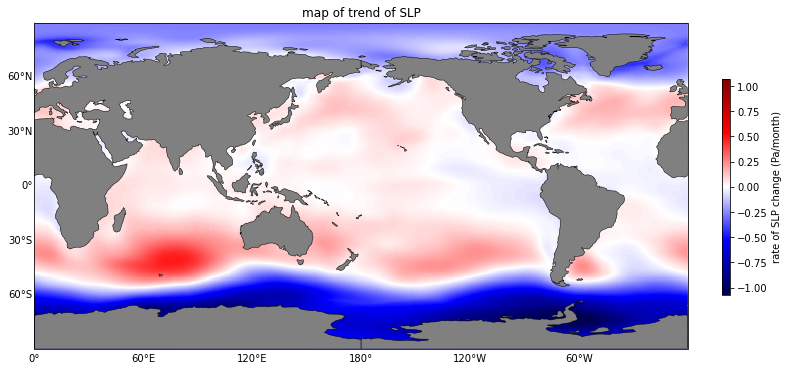

In [11]:
plt.figure(figsize(12,6))

# clev = np.arange(-1e-4,1e-4,1e-5)

ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(land_50m)
# ax.set_extent([-250, -50, -60, 10], crs=ccrs.PlateCarree())

gridlines = ax.gridlines(draw_labels=True) # add gridlines
gridlines.xlines = False 
gridlines.ylines = False # do not show x and y liene, necause we only want to add the longitude and latitude.
gridlines.right_labels = False
gridlines.top_labels = False
p1 = trend_unstacked_psl.plot(cmap=cmp, extend='both',
                              # vmin=-10e-5, vmax=10e-5,
                        add_colorbar=False, transform=ccrs.PlateCarree())
p1.cmap.set_over(color=cmp(255), alpha=None)
plt.title('map of trend of SLP')
    
    
ax2 = plt.axes([0.93,0.25,0.01,0.5])
cb = plt.colorbar(p1,cax=ax2, orientation='vertical')
cb.ax.set_ylabel('rate of SLP change (Pa/month)')

savefigure('map of trend of SLP 1deg_c2')